# 4.2.1 Ubangi/Lua-Gebiet

In [145]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

C:\Users\Dirk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Stilgruppen

Bedingungen:
* nur Funde aus dem Ubangi/Lua-Gebiet
* Typen sind klar und enthalten keine '?' und sind nicht leer

In [354]:
sql = """SELECT t_Obj.objID,
            t_Ort.ort_name AS ort_kurz,
            t_Ort.ort_fluss,
            t_Ort."Kat-Nr",
            t_Obj.Typ
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Komplex.ortID = t_Ort.ortID
        WHERE (((t_Ort.ort_lit) = 'DS')
            AND ((t_Obj.Typ) Not Like '')
            AND ((t_Obj.Typ) Not Like '%/%')
            AND ((t_Obj.Typ) Not Like '%(?)%')
            AND (((t_Ort.ort_fluss) Like '%Ubangi%')
            OR ((t_Ort.ort_fluss) Like '%Lua%')))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['STIL'] = df['Typ']

stilgr = pd.read_csv("../lit/Wotzka1995_StilGrKuerzel.csv")
stilgr['STILGR'] = stilgr['Seidensticker'] + ' ' + stilgr['Stilgruppe']

# dictionary der Stilgruppen-Kürzel und Stilgruppen
di = stilgr.set_index('Typ').to_dict()['STILGR']

df = df.replace({"Typ": di})

a = df['Typ'].str.split(' ', expand = True)
b = a[0].str.split('.', expand = True)

b[1] = pd.to_numeric(b[1])
b[2] = pd.to_numeric(b[2])
b[3] = pd.to_numeric(b[3])

df = pd.concat([df, b], axis = 1)
df.head()

,objID,ort_kurz,ort_fluss,Kat-Nr,Typ,STIL,0,1,2,3
0,10,Batanga,Ubangi,209,4.2.1.10 Mbati-Ngombe,MBN,4,2,1,10
1,21,Bobulu,Ubangi,198,4.2.1.4 Bobulu,BBL,4,2,1,4
2,22,Bobulu,Ubangi,198,4.2.1.4 Bobulu,BBL,4,2,1,4
3,36,Bokwango,Ubangi,190,4.2.1.6 Bokwango,BKW,4,2,1,6
4,43,Balongoi,Ubangi,214,4.2.1.7 Motengo-Boma,MTB,4,2,1,7


In [355]:
df = df.replace('', np.nan, regex=True)
df = df[pd.notnull(df['Typ'])]

sicher = df

In [356]:
df_pivot = df.pivot_table(values = 'objID', index = ['Kat-Nr', 'ort_kurz'], columns = [1, 2, 3, 'STIL'], aggfunc = len)
df_pivot = df_pivot.sort_index(ascending=[False])
display(df_pivot.head())

1                    2                                                      3  \
2                    1                                                  2   1   
3                   1   2    3    4   5   6    7    8    9    10  11   4   2    
STIL               BTM NGB  DON  BBL MKL BKW  MTB  KPT  DAM  MBN BAN  MAT BDG   
Kat-Nr ort_kurz                                                                 
232    Ilawa       NaN NaN  NaN  NaN NaN NaN  1.0  NaN  NaN  2.0 NaN  NaN NaN   
230    Maluba    127.0 NaN  9.0  2.0 NaN NaN  4.0  NaN  5.0  5.0 NaN  4.0 NaN   
229    Kouango     NaN NaN  NaN  NaN NaN NaN  NaN  1.0  NaN  NaN NaN  NaN NaN   
228    Sidi        NaN NaN  NaN  NaN NaN NaN  NaN  NaN  1.0  NaN NaN  NaN NaN   
227    Ndengu      NaN NaN  NaN  NaN NaN NaN  NaN  NaN  1.0  NaN NaN  NaN NaN   

1                    
2                    
3                4   
STIL            BOT  
Kat-Nr ort_kurz      
232    Ilawa    NaN  
230    Maluba   NaN  
229    Kouango  NaN  
228    Sidi     NaN  
227    Ndengu   NaN

In [357]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
plt.rcdefaults()
%matplotlib inline

In [358]:
from matplotlib import colors

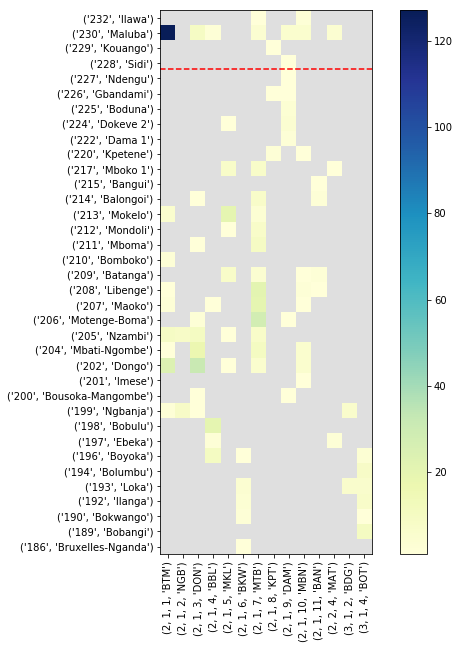

In [359]:
fig = plt.figure(1)
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
plt.imshow(df_pivot, interpolation='nearest', cmap='YlGnBu')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
plt.axhline(3.4, color='red', linestyle = '--')
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.25)
plt.colorbar()
plt.savefig('../output/figs/4-2-1_Ubangi_Stilgr.pdf', bbox_inches='tight')
plt.show()

In [360]:
tab = df_pivot

In [361]:
df_pivot = df.pivot_table(values = 'objID', index = ['Kat-Nr', 'ort_kurz'], columns = [1, 2, 3, 'Typ'], aggfunc = len, fill_value = 0)
df_pivot = df_pivot.sort_index(ascending=[False])
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
# display(df_perc.head())

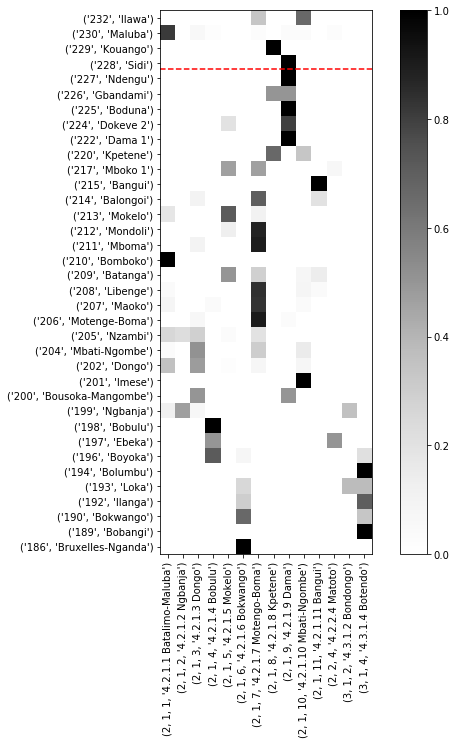

In [362]:
fig = plt.figure(1)
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
plt.imshow(df_perc, interpolation='nearest', cmap='Greys')
plt.yticks(range(len(df_perc.index)), df_perc.index)
plt.xticks(range(len(df_perc.columns)), df_perc.columns, rotation='vertical')
plt.axhline(3.4, color='red', linestyle = '--')
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.25)
plt.colorbar()
plt.savefig('../output/figs/4-2-1_Ubangi_Stilgr_B.pdf', bbox_inches='tight')
plt.show()

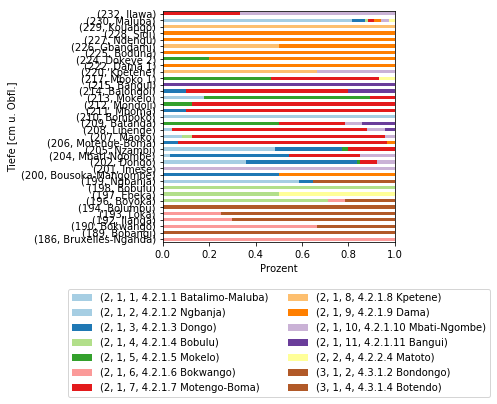

In [363]:
ax = df_perc.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Prozent')
plt.ylabel('Tiefe [cm u. Obfl.]')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().invert_yaxis()
plt.gca().set_aspect(0.025)
plt.gca().set_aspect((abs(xlim[0]) + 1) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlim([0,1])
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.show()

In [383]:
# Tabelle nur mit den fraglichen Stücken

sql = """SELECT t_Obj.objID,
            t_Ort.ort_name AS ort_kurz,
            t_Ort.ort_fluss,
            t_Ort."Kat-Nr",
            t_Obj.Typ
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Komplex.ortID = t_Ort.ortID
        WHERE (((t_Ort.ort_lit) = 'DS')
            AND ((t_Obj.Typ) Like '%/%')
            OR ((t_Obj.Typ) Like '%(?)%')
            AND (((t_Ort.ort_fluss) Like '%Ubangi%')
            OR ((t_Ort.ort_fluss) Like '%Lua%')))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Kat-Nr'] = pd.to_numeric(df['Kat-Nr'])

df = df[df['Kat-Nr'] <= 233]

# (?) und alles nach / weg
df['Typ'] = df['Typ'].map(lambda x: x.rstrip(' (?)'))
df['Typ'] = df['Typ'].apply(lambda x: x.split('/')[0])

df['STIL'] = df['Typ']

df = df.replace({"Typ": di})

a = df['Typ'].str.split(' ', expand = True)
b = a[0].str.split('.', expand = True)

b[1] = pd.to_numeric(b[1])
b[2] = pd.to_numeric(b[2])
b[3] = pd.to_numeric(b[3])

df = pd.concat([df, b], axis = 1)

df_pivot = df.pivot_table(values = 'objID', index = 'Kat-Nr', columns = ['Typ', 'STIL'], aggfunc = len, fill_value=0)
df_pivot = df_pivot.sort_index(ascending=[False])

fragl = df_pivot

fragl[fragl != 0] = 0.5
fragl = fragl.unstack().reset_index()
fragl.head()

,Typ,STIL,Kat-Nr,0
0,4.2.1.1 Batalimo-Maluba,BTM,188,0.0
1,4.2.1.1 Batalimo-Maluba,BTM,189,0.0
2,4.2.1.1 Batalimo-Maluba,BTM,190,0.0
3,4.2.1.1 Batalimo-Maluba,BTM,191,0.0
4,4.2.1.1 Batalimo-Maluba,BTM,192,0.0


In [384]:
len(fragl)

560

In [385]:
df_pivot = sicher.pivot_table(values = 'objID', index = 'Kat-Nr', columns = ['Typ', 'STIL'], aggfunc = len, fill_value=0)
df_pivot = df_pivot.sort_index(ascending=[False])
sicherPiv = df_pivot

sicherPiv[sicherPiv != 0] = 1
sicherPiv = sicherPiv.unstack().reset_index()
sicherPiv.head()

,Typ,STIL,Kat-Nr,0
0,4.2.1.1 Batalimo-Maluba,BTM,186,0
1,4.2.1.1 Batalimo-Maluba,BTM,189,0
2,4.2.1.1 Batalimo-Maluba,BTM,190,0
3,4.2.1.1 Batalimo-Maluba,BTM,192,0
4,4.2.1.1 Batalimo-Maluba,BTM,193,0


In [386]:
len(sicherPiv)

504

In [387]:
styles = sicherPiv.append(fragl, ignore_index = True)
styles['Kat-Nr'] = pd.to_numeric(styles['Kat-Nr'])
styles = styles.rename(columns={0:'Val'})
styles.head()

,Typ,STIL,Kat-Nr,Val
0,4.2.1.1 Batalimo-Maluba,BTM,186,0.0
1,4.2.1.1 Batalimo-Maluba,BTM,189,0.0
2,4.2.1.1 Batalimo-Maluba,BTM,190,0.0
3,4.2.1.1 Batalimo-Maluba,BTM,192,0.0
4,4.2.1.1 Batalimo-Maluba,BTM,193,0.0


In [388]:
len(styles)

1064

In [389]:
a = styles['Typ'].str.split(' ', expand = True)
b = a[0].str.split('.', expand = True)

b[1] = pd.to_numeric(b[1])
b[2] = pd.to_numeric(b[2])
b[3] = pd.to_numeric(b[3])

styles = pd.concat([styles, b], axis = 1)

In [390]:
orte = df.pivot_table(values = 'objID', index = ['Kat-Nr', 'ort_kurz'], aggfunc = len)
orte = orte.reset_index()

styles = pd.merge(styles, orte, on='Kat-Nr', how='left')

In [391]:
stylesPiv = styles.pivot_table(values = 'Val', index = ['Kat-Nr', 'ort_kurz'], columns = [1, 2, 3, 'STIL'], aggfunc = sum, fill_value=0)
stylesPiv = stylesPiv.sort_index(ascending=[False])
stylesPiv[stylesPiv == 0] = '-'
stylesPiv[stylesPiv == 1.5] = "$\\bullet $"
stylesPiv[stylesPiv == 1.0] = "$\\bullet $"
stylesPiv[stylesPiv == 0.5] = "$\circ $"
stylesPiv.reset_index().to_latex('../output/tabs/4-2-1_Ubangi-Lua-Gebiet_Sequenz.tex',
                                 index = False, escape = False, encoding='utf-8')
stylesPiv

1                                  2                                      \
2                                  1                                       
3                                 1           2           3           4    
STIL                             BTM         NGB         DON         BBL   
Kat-Nr ort_kurz                                                            
232    Ilawa                       -           -    $\circ $           -   
230    Maluba             $\bullet $    $\circ $  $\bullet $  $\bullet $   
229    Kouango                     -           -           -           -   
227    Ndengu                      -           -           -           -   
226    Gbandami                    -           -           -           -   
225    Boduna                      -           -           -           -   
224    Dokeve 2                    -           -           -           -   
222    Dama 1                      -           -           -           -   
217    Mboko 1                     -           -    $\circ $           -   
214    Balongoi                    -           -  $\bullet $           -   
213    Mokelo             $\bullet $           -           -           -   
212    Mondoli              $\circ $           -           -           -   
211    Mboma                       -           -  $\bullet $           -   
210    Bomboko            $\bullet $           -           -           -   
209    Batanga                     -           -    $\circ $           -   
208    Libenge            $\bullet $           -           -           -   
207    Maoko              $\bullet $    $\circ $           -  $\bullet $   
206    Motenge-Boma         $\circ $           -  $\bullet $           -   
205    Nzambi             $\bullet $  $\bullet $  $\bullet $    $\circ $   
204    Mbati-Ngombe       $\bullet $           -  $\bullet $           -   
203    Ubangi, Fkm 415,5    $\circ $           -           -           -   
202    Dongo              $\bullet $           -  $\bullet $           -   
201    Imese                       -           -           -           -   
200    Bousoka-Mangombe            -           -  $\bullet $           -   
199    Ngbanja            $\bullet $  $\bullet $  $\bullet $           -   
198    Bobulu                      -           -           -  $\bullet $   
197    Ebeka                       -    $\circ $           -  $\bullet $   
196    Boyoka                      -           -           -  $\bullet $   
194    Bolumbu                     -           -           -           -   
193    Loka                        -    $\circ $           -           -   
192    Ilanga                      -           -           -           -   
191    Zamba                       -           -           -           -   
190    Bokwango                    -           -           -           -   
189    Bobangi                     -           -           -           -   
188    Lokekya                     -           -           -           -   

1                                                                         \
2                                                                          
3                                 5           6           7           8    
STIL                             MKL         BKW         MTB         KPT   
Kat-Nr ort_kurz                                                            
232    Ilawa                       -           -  $\bullet $           -   
230    Maluba                      -           -  $\bullet $           -   
229    Kouango              $\circ $           -           -  $\bullet $   
227    Ndengu                      -           -           -           -   
226    Gbandami                    -           -           -  $\bullet $   
225    Boduna                      -           -           -    $\circ $   
224    Dokeve 2           $\bullet $           -           -           -   
222    Dama 1                      -           